In [1]:
doc1 = "Sugar is bad to consume. My sister likes to have sugar, but not my father."
doc2 = "My father spends a lot of time driving my sister around to dance practice."
doc3 = "Doctors suggest that driving may cause increased stress and blood pressure."
doc4 = "Sometimes I feel pressure to perform well at school, but my father never seems to drive my sister to do better."
doc5 = "Health experts say that Sugar is not good for your lifestyle."

# compile documents
doc_complete = [doc1, doc2, doc3, doc4, doc5]
doc_complete

['Sugar is bad to consume. My sister likes to have sugar, but not my father.',
 'My father spends a lot of time driving my sister around to dance practice.',
 'Doctors suggest that driving may cause increased stress and blood pressure.',
 'Sometimes I feel pressure to perform well at school, but my father never seems to drive my sister to do better.',
 'Health experts say that Sugar is not good for your lifestyle.']

In [13]:
#Cleaning and Preprocessing
#Cleaning is an important step before any text mining task, in this step, we will remove the punctuations, 
#stopwords and normalize the corpus.
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
import pandas as pd

# Importing Gensim
import gensim
from gensim import corpora


In [29]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 

lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word, pos='v') for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in doc_complete]

In [31]:
doc_clean[:10]

list

In [43]:
#Another way of doing cleaning ...so we can use either above one or this one.The only difference is  above will create a list
#after pre-process and this one  will create a dataframe
#Write a function to perform lemmatize and stem preprocessing steps on the data set.
#Kindly note use any 1 above or this,if using above skip this step and vice versa.Also if use this method in further 
#code use processed_docs instead of doc_clean which is  output of above.
doc_complete = pd.DataFrame(doc_complete)
doc_complete.columns = ["header"]


def lemmatize_stemming(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result
#Now Preprocess the headline text, saving the results as ‘processed_docs’
processed_docs = doc_complete["header"].map(preprocess)
processed_docs[:10]

In [57]:
#Preparing Document-Term Matrix

# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(doc_clean)


count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break
#So this output shoes the index been applied to each word
#Here if count break is just used to show few sample words and there index

0 bad
1 consume
2 father
3 like
4 sister
5 sugar
6 around
7 dance
8 drive
9 lot
10 practice


In [55]:
#This is  optional code and is basically used if  we want to filter some tokens  from huge amount to tokens and which is present  in rare documents
#Filter out tokens that appear in
    #less than 15 documents (absolute number) or
    #more than 0.5 documents (fraction of total corpus size, not absolute number).
    #after the above two steps, keep only the first 100000 most frequent tokens.
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

#Dont run for this dataset as we have just used  documents for running and validating the code

In [58]:
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

In [59]:
#So we can run multiple iterations of LDA first using document term matrix and then using TF-IDF to see which  gives us
# more coherence score
#TF-IDF
#Create tf-idf model object using models.TfidfModel on ‘doc_term_matrix’ and save it to ‘tfidf’,
#then apply transformation to the entire corpus and call it ‘corpus_tfidf’.
#Finally we preview TF-IDF scores for our first document.
from gensim import corpora, models
tfidf = models.TfidfModel(doc_term_matrix)
corpus_tfidf = tfidf[doc_term_matrix]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break
    

[(0, 0.4715096067582428),
 (1, 0.4715096067582428),
 (2, 0.14965422842541531),
 (3, 0.4715096067582428),
 (4, 0.14965422842541531),
 (5, 0.5368829444421276)]


In [18]:
#Running LDA Model
#Next step is to create an object for LDA model and train it on Document-Term matrix. The training also requires few 
#parameters as input which are explained in the above section. The gensim module 
#allows both LDA model estimation from a training corpus and inference of topic distribution on new, unseen documents.

# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel



In [62]:
# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=3, id2word = dictionary, passes=50)

print(ldamodel.print_topics())

[(0, '0.137*"sugar" + 0.055*"consume" + 0.055*"bad" + 0.055*"like" + 0.055*"health" + 0.055*"good" + 0.055*"experts" + 0.055*"say" + 0.055*"lifestyle" + 0.055*"father"'), (1, '0.066*"pressure" + 0.066*"drive" + 0.066*"cause" + 0.066*"blood" + 0.066*"may" + 0.066*"stress" + 0.066*"suggest" + 0.066*"doctor" + 0.066*"increase" + 0.016*"sister"'), (2, '0.072*"father" + 0.072*"sister" + 0.072*"drive" + 0.041*"well" + 0.041*"perform" + 0.041*"never" + 0.041*"feel" + 0.041*"better" + 0.041*"seem" + 0.041*"sometimes"')]


In [65]:
#Now let see the results..here 0 ,1, 2 ... are topic and sugar,bad and  so on are word of  that topic
print(ldamodel.print_topics(num_topics=3, num_words=3))
#Each line is a topic with individual topic terms and weights.Here weight represents how important that word is for the topic?
#Topic1 can be termed as Bad Health, and Topic3 can be termed as Family.

[(0, '0.137*"sugar" + 0.055*"like" + 0.055*"consume"'), (1, '0.066*"pressure" + 0.066*"drive" + 0.066*"stress"'), (2, '0.072*"father" + 0.072*"sister" + 0.072*"drive"')]


In [66]:
from pprint import pprint
pprint(c.print_topics())

[(0,
  '0.137*"sugar" + 0.055*"consume" + 0.055*"bad" + 0.055*"like" + '
  '0.055*"health" + 0.055*"good" + 0.055*"experts" + 0.055*"say" + '
  '0.055*"lifestyle" + 0.055*"father"'),
 (1,
  '0.066*"pressure" + 0.066*"drive" + 0.066*"cause" + 0.066*"blood" + '
  '0.066*"may" + 0.066*"stress" + 0.066*"suggest" + 0.066*"doctor" + '
  '0.066*"increase" + 0.016*"sister"'),
 (2,
  '0.072*"father" + 0.072*"sister" + 0.072*"drive" + 0.041*"well" + '
  '0.041*"perform" + 0.041*"never" + 0.041*"feel" + 0.041*"better" + '
  '0.041*"seem" + 0.041*"sometimes"')]


In [67]:
#For each topic, we will explore the words occuring in that topic and its relative weight.
for idx, topic in ldamodel.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))
#Can you distinguish different topics using the words in each topic and their corresponding weights

Topic: 0 
Words: 0.137*"sugar" + 0.055*"consume" + 0.055*"bad" + 0.055*"like" + 0.055*"health" + 0.055*"good" + 0.055*"experts" + 0.055*"say" + 0.055*"lifestyle" + 0.055*"father"
Topic: 1 
Words: 0.066*"pressure" + 0.066*"drive" + 0.066*"cause" + 0.066*"blood" + 0.066*"may" + 0.066*"stress" + 0.066*"suggest" + 0.066*"doctor" + 0.066*"increase" + 0.016*"sister"
Topic: 2 
Words: 0.072*"father" + 0.072*"sister" + 0.072*"drive" + 0.041*"well" + 0.041*"perform" + 0.041*"never" + 0.041*"feel" + 0.041*"better" + 0.041*"seem" + 0.041*"sometimes"


In [68]:
#Running LDA using TF-IDF
ldamodel_tfidf = Lda(corpus_tfidf, num_topics=3, id2word = dictionary, passes=50) 
for idx, topic in ldamodel_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))
 

Topic: 0 Word: 0.052*"sugar" + 0.048*"consume" + 0.048*"like" + 0.048*"bad" + 0.040*"well" + 0.040*"feel" + 0.040*"never" + 0.040*"school" + 0.040*"seem" + 0.040*"sometimes"
Topic: 1 Word: 0.046*"experts" + 0.046*"say" + 0.046*"lifestyle" + 0.046*"health" + 0.046*"good" + 0.042*"increase" + 0.042*"blood" + 0.042*"stress" + 0.042*"suggest" + 0.042*"cause"
Topic: 2 Word: 0.052*"practice" + 0.052*"dance" + 0.052*"time" + 0.052*"around" + 0.052*"spend" + 0.052*"lot" + 0.033*"drive" + 0.032*"father" + 0.032*"sister" + 0.024*"sugar"


In [70]:
#Testing model on unseen document
unseen_document = 'I consume lot of sugar'
new_vec = dictionary.doc2bow(preprocess(unseen_document))
for index, score in sorted(ldamodel[new_vec], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, ldamodel.print_topic(index, 5)))
#From below we can see score is more in topic 0 , hence our new document belongs to topic 1

Score: 0.7767626047134399	 Topic: 0.137*"sugar" + 0.055*"like" + 0.055*"consume" + 0.055*"bad" + 0.055*"health"
Score: 0.111738421022892	 Topic: 0.066*"pressure" + 0.066*"drive" + 0.066*"stress" + 0.066*"may" + 0.066*"blood"
Score: 0.11149900406599045	 Topic: 0.072*"sister" + 0.072*"father" + 0.072*"drive" + 0.041*"better" + 0.041*"seem"


In [71]:
#Now see the detailed view
import gensim.corpora as corpora
def format_topics_sentences(ldamodel=None, doc_term_matrix=doc_term_matrix, texts=doc_clean):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[doc_term_matrix]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, doc_term_matrix=doc_term_matrix, texts=doc_clean)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.9129,"sugar, consume, bad, like, health, good, experts, say, lifestyle, father","[sugar, bad, consume, sister, like, sugar, father]"
1,1,2.0,0.9317,"father, sister, drive, well, perform, never, feel, better, seem, sometimes","[father, spend, lot, time, drive, sister, around, dance, practice]"
2,2,1.0,0.9319,"pressure, drive, cause, blood, may, stress, suggest, doctor, increase, sister","[doctor, suggest, drive, may, cause, increase, stress, blood, pressure]"
3,3,2.0,0.9472,"father, sister, drive, well, perform, never, feel, better, seem, sometimes","[sometimes, feel, pressure, perform, well, school, father, never, seem, drive, sister, better]"
4,4,0.0,0.9042,"sugar, consume, bad, like, health, good, experts, say, lifestyle, father","[health, experts, say, sugar, good, lifestyle]"


In [72]:
df_topic_distribution = df_dominant_topic['Dominant_Topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution["Num Documents"].sum()
df_topic_distribution

,Topic Num,Num Documents
0,2.0,2
1,0.0,2
2,1.0,1


In [73]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 1000

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9129,"sugar, consume, bad, like, health, good, experts, say, lifestyle, father","[sugar, bad, consume, sister, like, sugar, father]"
1,1.0,0.9319,"pressure, drive, cause, blood, may, stress, suggest, doctor, increase, sister","[doctor, suggest, drive, may, cause, increase, stress, blood, pressure]"
2,2.0,0.9472,"father, sister, drive, well, perform, never, feel, better, seem, sometimes","[sometimes, feel, pressure, perform, well, school, father, never, seem, drive, sister, better]"


IndexError: list index out of range

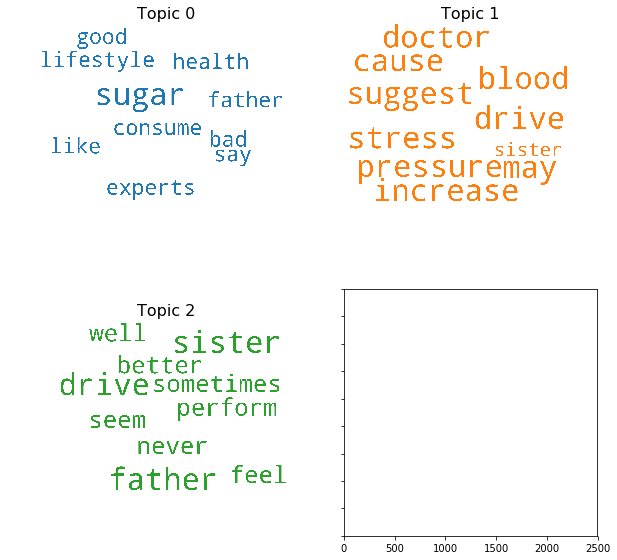

In [74]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(#stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [ ]:
#Tips to improve results of topic modeling
#(1) Frequency Filter - 
    #Arrange every term according to its frequency.
    #Terms with higher frequencies are more likely to appear in the results as compared ones with low frequency.
    #The low frequency terms are essentially weak features of the corpus, hence it is a good practice to get rid 
        #of all those weak features.
    #An exploratory analysis of terms and their frequency can help to decide what frequency value should be considered 
        #as the threshold.

#(2) Part of Speech Tag Filter
    #POS tag filter is more about the context of the features than frequencies of features
    #So keep the POS which is sensible
#(3) Batch Wise LDA –
    #In order to retrieve most important topic terms, a corpus can be divided into batches of fixed sizes.
    #Running LDA multiple times on these batches will provide different results, however, the best topic
    #terms will be the intersection of all batches.
    
#its end here
